# IEA37 example site

[Try this yourself](https://colab.research.google.com/github/DTUWindEnergy/PyWake/blob/master/docs/notebooks/IEA37Site.ipynb) (requires google account)


In [0]:
%%capture
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install py_wake


PyWake contains a few predefined sites, e.g. the [IEA task 37](https://github.com/byuflowlab/iea37-wflo-casestudies) sites

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from py_wake.examples.data.iea37 import IEA37Site

n_wt = 16 # must be 16, 32 or 64
site = IEA37Site(n_wt)


IEA37Site is a `UniformSite`, see documentation [here](https://topfarm.pages.windenergy.dtu.dk/PyWake/site/UniformSite.html)

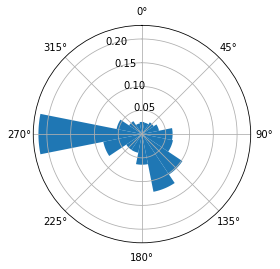

In [3]:
site.plot_wd_distribution(n_wd=16)

For the IEA task 37, the wind speed is constant (9.8 m/s) and the wind speed distribution is therefore constant

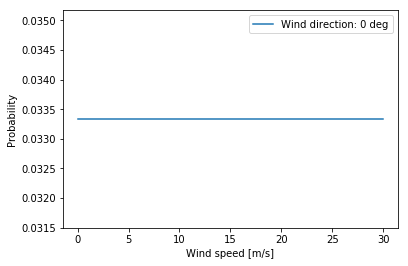

In [4]:
site.plot_ws_distribution(wd=[0])

The local wind is equal to the reference wind as it is a uniform (non-complex) site

In [5]:
ref_wd = 90 # reference wind direction
ref_ws = 10 # reference wind speed
WD,WS,TI, P = site.local_wind(x_i=[0],y_i=[0], wd=90, ws=10)

# conditions at local position (0,0):
print ('local wind direction:', WD[0,0,0])
print ('local wind speed:', WS[0,0,0])
print ('local turbulence intensity:', TI[0,0,0])

local wind direction: 90.0
local wind speed: 10.0
local turbulence intensity: 0.75


The distances between points are the straight line distances as it is a uniform (flat) site

In [100]:
src_x, src_y, src_h = 0, 0, 70
dst_x, dst_y, dst_h = 0, -100, 90
wd = [0, 30,90] # wind direction at source

dw_ijl, cw_ijl,dh_ijl,_ = site.distances(src_x_i=[src_x], src_y_i=[src_y], src_h_i=[src_h],
                                         dst_x_j=[dst_x], dst_y_j=[dst_y], dst_h_j=[dst_h],
                                         wd_il=[wd])

for i, wd_ in enumerate(wd):
    print ('Wind direction: %d deg'%wd_)
    print ('Down wind distance: %.1fm'%dw_ijl[0,0,i])
    print ('Cross wind distance: %.1fm'%cw_ijl[0,0,i])
    print ()

Wind direction: 0 deg
Down wind distance: 100.0m
Cross wind distance: 0.0m

Wind direction: 30 deg
Down wind distance: 86.6m
Cross wind distance: 50.0m

Wind direction: 90 deg
Down wind distance: 0.0m
Cross wind distance: 100.0m

